 Método del trapezoide: 0.746817748654472  
 Método de Simpson: 0.7468241329010564 
 Error con trapezoide: 8.548408754429327e-06 
 Error con Simpson: 1.186751113531489e-10


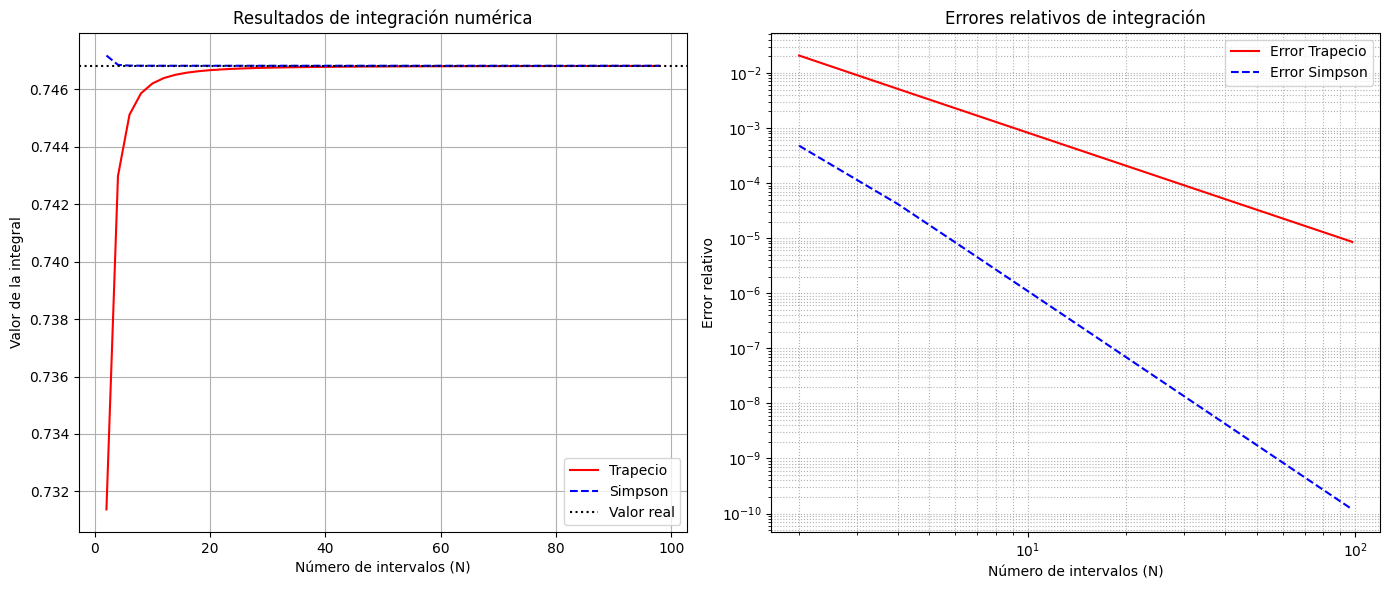

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def funcionIntegrar(variableIndependiente): #Función a integrar

    #Parámetros: variableIndependiente (tipo flotante): valor de t en el que se evalúa la función.

#Se retorna el valor de función en el punto t con el siguiente criterio.
  

    return np.exp(-variableIndependiente**2)

# Se escribe la función para integración numérica por el método del trapezoide.
def trap(func, intervalos, limitSup, limitInf):

    # Determinar dirección de integración
    if limitSup >= limitInf:
        direccion = 1
        diferencialDiscreto = (limitSup - limitInf) / intervalos
        puntoInicio = limitInf
        #Es definido el punto de inicio con el límite inferior, como inicio de la trayectoria de integración.
        # Se podría quizás utilizar las funciones abs() o min().
 
    else:
        direccion = -1
        diferencialDiscreto = (limitInf - limitSup) / intervalos
        puntoInicio = limitSup
  # Integración en dirección negativa (límites invertidos)
        # Se aplica el teorema de Fubini, tal que,

    # Evaluación inicial y final
    resultadoIntegral = 0.5 * (func(puntoInicio) + func(limitSup))

    # Sumatoria sobre los puntos internos
    for particion in range(1, intervalos):
        resultadoIntegral += func(puntoInicio + particion * diferencialDiscreto)

   #Retorna el resultado de la integral, luego de completar el ciclo for ajustando la dirección de integración.
    return resultadoIntegral * diferencialDiscreto * direccion

# Se escribe la función para integración numérica por el método de Simpson.
def simp(func, intervalos, limitSup, limitInf):
    # Validación de número par de intervalos por contrucción del método.
    if intervalos%2==1:
        raise ValueError("El número de intervalos debe ser par para Simpson.")

    # Se determina la dirección de integración
    if limitSup >= limitInf:
        direccion = 1
        diferencialDiscreto = (limitSup - limitInf) / intervalos
        puntoInicio = limitInf
    else:
        direccion = -1
        diferencialDiscreto = (limitInf - limitSup) / intervalos
        puntoInicio = limitSup

    # Evaluación inicial y final
    resultadoIntegral = func(puntoInicio) + func(limitSup)

    # Suma sobre puntos intermedios
    for particion in range(1, intervalos):
        x = puntoInicio+particion*diferencialDiscreto
        if particion%2==0:  # múltiplos de 2, implica coeficientes de 2
            resultadoIntegral+= 2 * func(x)
        else:  # impares, esto implica coeficientes de 4
            resultadoIntegral+= 4 * func(x)

    return resultadoIntegral*(diferencialDiscreto/3)*direccion


# Este es el valor de referencia en [0,1].
funcionValorEn1 = 0.746824132812427025

# Esta función es para calcular el valor absoluto del error relativo.
def error(resultado):
    return abs((resultado -funcionValorEn1)/funcionValorEn1)


# Intervalos a probar
intervalosLista = np.arange(2, 100, 2)  # solo pares para Simpson

# Se inician las listas para almacenar resultados y errores
resultadosTrap = []
resultadosSimp = []
erroresTrap = []
erroresSimp = []

for N in intervalosLista:
    
    rTrap = trap(funcionIntegrar, N, 1, 0)
    
    rSimp = simp(funcionIntegrar, N, 1, 0)
    
    resultadosTrap.append(rTrap)
    
    resultadosSimp.append(rSimp)

    erroresTrap.append(error(rTrap))
    erroresSimp.append(error(rSimp))



#Se imprimen los resultados.

print(f" Método del trapezoide: {resultadosTrap[-1]}  \n Método de Simpson: {resultadosSimp[-1]} \n Error con trapezoide: {erroresTrap[-1]} \n Error con Simpson: {erroresSimp[-1]}")

#Se grafican los resultados en función de lo solicitado.
plt.figure(figsize=(14,6)) #Se ajusta el tamaño de las figuras.



# Resultados de las integrales
plt.subplot(1,2,1)

plt.plot(intervalosLista, resultadosTrap, label="Trapecio", color="red")

plt.plot(intervalosLista, resultadosSimp, label="Simpson", color="blue", linestyle="--")

plt.axhline(funcionValorEn1, color="black", linestyle=":", label="Valor real")

plt.title("Resultados de integración numérica")

plt.xlabel("Número de intervalos (N)")

plt.ylabel("Valor de la integral")

plt.legend()

plt.grid(True)

# Errores relativos

plt.subplot(1,2,2)

plt.loglog(intervalosLista, erroresTrap, label="Error Trapecio", color="red")

plt.loglog(intervalosLista, erroresSimp, label="Error Simpson", color="blue", linestyle="--")

plt.title("Errores relativos de integración")

plt.xlabel("Número de intervalos (N)")

plt.ylabel("Error relativo")

plt.legend()

plt.grid(True, which="both", linestyle=":")

plt.tight_layout()
plt.show()
#Se muestran las gráficas.